In [1]:
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [2]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [3]:
data=[] # list of lists of the from [similes, sequence, pKd]

with open('dataset.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) #skip header
    for row in reader:
        triplet=[]
        triplet.append(row[0])
        triplet.append(row[1])
        triplet.append(float(row[2]))
        data.append(triplet)

len(data)

9125

In [4]:
data[0] 

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [5]:
smiles=[]
proteins=[]
labels=[]
random.shuffle(data)

for triplet in range(len(data)):
      smiles.append(data[triplet][0])
      proteins.append(data[triplet][1])
      labels.append(data[triplet][2])

In [6]:
print(smiles[0])
print(proteins[0])
print(labels[0])

CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl
MPLRHWGMARGSKPVGDGAQPMAAMGGLKVLLHWAGPGGGEPWVTFSESSLTAEEVCIHIAHKVGITPPCFNLFALFDAQAQVWLPPNHILEIPRDASLMLYFRIRFYFRNWHGMNPREPAVYRCGPPGTEASSDQTAQGMQLLDPASFEYLFEQGKHEFVNDVASLWELSTEEEIHHFKNESLGMAFLHLCHLALRHGIPLEEVAKKTSFKDCIPRSFRRHIRQHSALTRLRLRNVFRRFLRDFQPGRLSQQMVMVKYLATLERLAPRFGTERVPVCHLRLLAQAEGEPCYIRDSGVAPTDPGPESAAGPPTHEVLVTGTGGIQWWPVEEEVNKEEGSSGSSGRNPQASLFGKKAKAHKAVGQPADRPREPLWAYFCDFRDITHVVLKEHCVSIHRQDNKCLELSLPSRAAALSFVSLVDGYFRLTADSSHYLCHEVAPPRLVMSIRDGIHGPLLEPFVQAKLRPEDGLYLIHWSTSHPYRLILTVAQRSQAPDGMQSLRLRKFPIEQQDGAFVLEGWGRSFPSVRELGAALQGCLLRAGDDCFSLRRCCLPQPGETSNLIIMRGARASPRTLNLSQLSFHRVDQKEITQLSHLGQGTRTNVYEGRLRVEGSGDPEEGKMDDEDPLVPGRDRGQELRVVLKVLDPSHHDIALAFYETASLMSQVSHTHLAFVHGVCVRGPENIMVTEYVEHGPLDVWLRRERGHVPMAWKMVVAQQLASALSYLENKNLVHGNVCGRNILLARLGLAEGTSPFIKLSDPGVGLGALSREERVERIPWLAPECLPGGANSLSTAMDKWGFGATLLEICFDGEAPLQSRSPSEKEHFYQRQHRLPEPSCPQLATLTSQCLTYEPTQRPSFRTILRDLTRLQPHNLADVLTVNPDSPASDPTVFHKRYLKKIRDLGEGHFGKVSLYCYDPTNDGTGEMVAVKALKADCGPQHRSGWKQEIDILRTLYHEHI

In [7]:
split=int(0.9*len(smiles))
train_smiles = smiles[:split]
test_smiles=smiles[split:]
train_proteins=proteins[:split]
test_proteins=proteins[split:]
train_labels=labels[:split]
test_labels=labels[split:]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encode SMILES and protein sequences
label_encoder_smiles = LabelEncoder()
label_encoder_proteins = LabelEncoder()

# Flatten the sequences to fit the LabelEncoder and then reshape back
flat_smiles = [char for smile in train_smiles for char in smile]
flat_proteins = [char for protein in train_proteins for char in protein]

label_encoder_smiles.fit(flat_smiles)
label_encoder_proteins.fit(flat_proteins)

# Encode sequences
train_encoded_smiles = [label_encoder_smiles.transform(list(smile)) for smile in train_smiles]
test_encoded_smiles = [label_encoder_smiles.transform(list(smile)) for smile in test_smiles]

train_encoded_proteins = [label_encoder_proteins.transform(list(protein)) for protein in train_proteins]
test_encoded_proteins = [label_encoder_proteins.transform(list(protein)) for protein in test_proteins]

# Pad sequences
train_padded_smiles = pad_sequences(train_encoded_smiles, truncating="post", padding="post", maxlen=85)
test_padded_smiles = pad_sequences(test_encoded_smiles, truncating="post", padding="post", maxlen=85)

train_padded_proteins = pad_sequences(train_encoded_proteins, truncating="post", padding="post", maxlen=1200)
test_padded_proteins = pad_sequences(test_encoded_proteins, truncating="post", padding="post", maxlen=1200)

# Convert to numpy arrays
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)


In [9]:
blosum62 = {
    'A': [ 4, -1, -2, -2,  0, -1, -1,  0, -2, -1, -1, -1, -1, -2, -1,  1,  0,  0, -3, -2],
    'C': [-1, 12, -3, -3, -3, -1, -3, -3, -1, -1, -3, -2, -2, -2, -2, -1, -1, -1, -2, -2],
    'D': [-2, -3,  6,  2, -3, -1, -1, -2,  1, -1, -1, -1, -1, -3, -2,  0, -1, -2, -4, -3],
    'E': [-2, -3,  2,  5, -3, -1,  0, -2,  0, -1, -1, -1, -1, -3, -2,  0, -1, -2, -3, -2],
    'F': [ 0, -3, -3, -3,  6, -1, -2, -3, -2, -1, -1, -1, -1, -3, -2, -1, -1, -2, -2, -3],
    'G': [-1, -1, -1, -1, -1,  6,  0, -2, -3, -2, -2, -2, -2, -3, -3, -1, -1, -1, -2, -2],
    'H': [ 0, -3, -1, -2, -3,  0,  8, -2, -2, -2, -2, -2, -2, -3, -3, -1, -1, -2, -2, -2],
    'I': [-2, -1,  1,  0, -2, -3, -3,  4,  2, -2, -1, -1, -1, -2, -3,  3, -1, -2, -2, -2],
    'K': [-1, -1, -1, -1, -1, -2, -2, -2, -2,  5,  2, -1, -1, -3, -2, -1, -1, -1, -2, -2],
    'L': [-1, -1, -1, -1, -1, -3, -3,  2,  4,  1,  2, -1, -1, -2, -3,  1,  0, -2, -2, -2],
    'M': [-1, -3, -1, -1, -1, -2, -2, -1,  2,  2,  6, -1, -1, -2, -2,  0,  0, -1, -2, -2],
    'N': [-1, -2, -1, -1, -1, -2, -2, -1,  1, -1, -1,  6,  2, -3, -2, -1, -1, -2, -4, -2],
    'P': [-1, -2, -1, -1, -1, -2, -2, -1, -1, -1, -1,  2,  7, -3, -2, -1, -1, -2, -4, -3],
    'Q': [-1, -2, -1, -1, -1, -2, -2, -2, -2, -3, -3, -3, -3,  6,  1, -1, -1, -2, -2, -3],
    'R': [-2, -2, -2, -2, -2, -3, -3, -2, -3, -2, -2, -3, -2,  1,  5, -1, -1, -3, -3, -2],
    'S': [-1, -2, -2, -2, -1, -3, -3, -1,  3, -1, -2, -2, -2, -1, -1,  4,  2, -2, -3, -3],
    'T': [ 1, -1, -1, -1, -1, -2, -2,  1,  0, -1, -1, -1, -1, -1, -1,  2,  5, -2, -2, -3],
    'V': [ 0, -1, -1, -1, -1, -2, -2,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,  4, -3, -3],
    'W': [-3, -3, -4, -4, -2, -3, -2, -3, -3, -2, -2, -4, -4, -2, -3, -3, -2, -3, 11,  2],
    'Y': [-2, -2, -3, -3, -3, -3, -2, -3, -3, -2, -2, -2, -3, -3, -2, -3, -2, -3,  2,  7]
}

In [10]:
import pandas as pd

blosum_df = pd.DataFrame(blosum62)

# Encoding function
def blosum_encode(sequence, blosum_df):
    encoded_sequence = []
    for amino_acid in sequence:
        if amino_acid in blosum_df.index:
            encoded_sequence.append(blosum_df.loc[amino_acid].values)
        else:
            # Handle unknown amino acids with a zero vector or other logic
            encoded_sequence.append(np.zeros(blosum_df.shape[1]))
    return np.array(encoded_sequence)

# Apply BLOSUM encoding
train_blosum_proteins = [blosum_encode(protein, blosum_df) for protein in train_proteins]
test_blosum_proteins = [blosum_encode(protein, blosum_df) for protein in test_proteins]

# Find the maximum sequence length
max_length_protein = max(len(seq) for seq in train_blosum_proteins + test_blosum_proteins)

# Pad sequences
def pad_blosum_sequences(sequences, max_length):
    padded_sequences = []
    for seq in sequences:
        if len(seq) < max_length:
            padding = np.zeros((max_length - len(seq), seq.shape[1]))
            padded_seq = np.vstack((seq, padding))
        else:
            padded_seq = seq[:max_length]
        padded_sequences.append(padded_seq)
    return np.array(padded_sequences)

train_blosum_proteins_padded = pad_blosum_sequences(train_blosum_proteins, max_length_protein)
test_blosum_proteins_padded = pad_blosum_sequences(test_blosum_proteins, max_length_protein)

# Ensure the shape is correct
print(f"Padded train BLOSUM proteins shape: {train_blosum_proteins_padded.shape}")
print(f"Padded test BLOSUM proteins shape: {test_blosum_proteins_padded.shape}")

Padded train BLOSUM proteins shape: (8212, 2549, 20)
Padded test BLOSUM proteins shape: (913, 2549, 20)


In [11]:
import gc
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv1D, LeakyReLU, Flatten, Input
from tensorflow.keras.optimizers import Adam
import os

def ganForDrug(XD):
    seq_len = XD.shape[1]
    
    if len(XD.shape) == 3:
        feature_dim = XD.shape[2]
    else:
        feature_dim = 1  # For 2D input, the feature dimension is 1

    zdim = 100  # Dimension of the noise vector

    def build_gen(zdim, seq_len, feature_dim):
        model = Sequential()
        model.add(Dense(256, input_dim=zdim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(seq_len * feature_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((seq_len, feature_dim)))
        return model

    def build_dis(seq_len, feature_dim):
        model = Sequential()
        model.add(Input(shape=(seq_len, feature_dim)))
        model.add(Conv1D(32, 4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv1D(64, 4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        return model

    discriminator = build_dis(seq_len, feature_dim)
    generator = build_gen(zdim, seq_len, feature_dim)

    d_optimizer = Adam(0.0002, 0.5)
    g_optimizer = Adam(0.0002, 0.5)
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    batch_size = 8  # Reduce the batch size
    epochs = 10

    def data_generator(XD, batch_size):
        while True:
            idx = np.random.randint(0, XD.shape[0], batch_size)
            batch = XD[idx].astype(np.float32)
            yield batch

    real_data_gen = data_generator(XD, batch_size)

    checkpoint_dir = './training_checkpoints'
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator=generator, discriminator=discriminator)

    def train_step(real_seqs):
        noise = np.random.normal(0, 1, (batch_size, zdim)).astype(np.float32)
        with tf.GradientTape() as tape:
            fake_seqs = generator(noise, training=True)
            real_output = discriminator(real_seqs, training=True)
            fake_output = discriminator(fake_seqs, training=True)
            d_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
            d_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
            d_loss = d_loss_real + d_loss_fake
        gradients_of_discriminator = tape.gradient(d_loss, discriminator.trainable_variables)
        d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        noise = np.random.normal(0, 1, (batch_size, zdim)).astype(np.float32)
        with tf.GradientTape() as tape:
            fake_seqs = generator(noise, training=True)
            fake_output = discriminator(fake_seqs, training=True)
            g_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        gradients_of_generator = tape.gradient(g_loss, generator.trainable_variables)
        g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        return d_loss, g_loss

    for epoch in range(epochs):
        for _ in range(len(XD) // batch_size):
            real_seqs = next(real_data_gen)
            d_loss, g_loss = train_step(real_seqs)
            print(f"{epoch} [D loss: {d_loss.numpy()}] [G loss: {g_loss.numpy()}]")

            # Memory optimization
            del real_seqs
            gc.collect()

        # Save checkpoint
        checkpoint.save(file_prefix=checkpoint_prefix)

    return generator, discriminator




In [11]:
XD = train_blosum_proteins_padded
XP = train_padded_smiles
print(XD.shape)
print(len(train_padded_smiles))

(8212, 2549, 20)
8212


In [27]:
# Train the Protein GAN


generator_smiles, discriminator_smiles = ganForDrug(train_padded_smiles)



C:\Users\Asus\Downloads\pgm2\pytorch\myvenv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\Asus\Downloads\pgm2\pytorch\myvenv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


0 [D loss: 2.0349533557891846] [G loss: 0.7133212089538574]
0 [D loss: 1.5183360576629639] [G loss: 0.6993851065635681]
0 [D loss: 1.7410659790039062] [G loss: 0.6808691024780273]
0 [D loss: 1.5083482265472412] [G loss: 0.6780402064323425]
0 [D loss: 1.4300872087478638] [G loss: 0.6706411838531494]
0 [D loss: 1.211125135421753] [G loss: 0.662010908126831]
0 [D loss: 1.1594278812408447] [G loss: 0.6489121317863464]
0 [D loss: 0.9873607158660889] [G loss: 0.6527585983276367]
0 [D loss: 1.0147854089736938] [G loss: 0.635382354259491]
0 [D loss: 0.953243613243103] [G loss: 0.626550555229187]
0 [D loss: 0.9434594511985779] [G loss: 0.6204333901405334]
0 [D loss: 0.9325900673866272] [G loss: 0.6098718047142029]
0 [D loss: 0.9201099276542664] [G loss: 0.6073884963989258]
0 [D loss: 0.9863225221633911] [G loss: 0.5872932076454163]
0 [D loss: 0.9006761312484741] [G loss: 0.6106576919555664]
0 [D loss: 0.9022638201713562] [G loss: 0.5916486978530884]
0 [D loss: 0.921553373336792] [G loss: 0.5724

In [28]:
# Train the SMILES GAN

# Generate protein sequences
generator_protein, discriminator_protein = ganForDrug(train_blosum_proteins_padded)

# Use the generated data
# Save them or use them in further models

0 [D loss: 1.382163643836975] [G loss: 0.7240149974822998]
0 [D loss: 1.6471928358078003] [G loss: 0.5225498676300049]
0 [D loss: 1.9067387580871582] [G loss: 0.37208813428878784]
0 [D loss: 2.237611770629883] [G loss: 0.2420375794172287]
0 [D loss: 2.5642738342285156] [G loss: 0.19466374814510345]
0 [D loss: 2.8487160205841064] [G loss: 0.13465924561023712]
0 [D loss: 3.125732183456421] [G loss: 0.12216813862323761]
0 [D loss: 3.180438995361328] [G loss: 0.13490796089172363]
0 [D loss: 3.183145046234131] [G loss: 0.11450450122356415]
0 [D loss: 3.3422892093658447] [G loss: 0.0773933082818985]
0 [D loss: 3.486567974090576] [G loss: 0.10599392652511597]
0 [D loss: 3.4873769283294678] [G loss: 0.09060700237751007]
0 [D loss: 3.3138184547424316] [G loss: 0.1193893551826477]
0 [D loss: 3.1194417476654053] [G loss: 0.13413527607917786]
0 [D loss: 3.0503177642822266] [G loss: 0.13465967774391174]
0 [D loss: 2.9382576942443848] [G loss: 0.1832798570394516]
0 [D loss: 2.8208231925964355] [G lo

In [29]:
num_samples = 8212
zdim = 100

noise_protein = np.random.normal(0, 1, (num_samples, zdim)).astype(np.float32)
generated_proteins = generator_protein.predict(noise_protein)

# Save generated protein sequences
np.save('generated_proteins.npy', generated_proteins)

# Save generated protein sequences as CSV
proteins_df = pd.DataFrame(generated_proteins.reshape(generated_proteins.shape[0], -1))
proteins_df.to_csv('generated_proteins.csv', index=False)

# Generate SMILES strings
noise_smiles = np.random.normal(0, 1, (num_samples, zdim)).astype(np.float32)
generated_smiles = generator_smiles.predict(noise_smiles)

# Save generated SMILES strings
np.save('generated_smiles.npy', generated_smiles)

# Reshape generated SMILES strings to 2D array for saving as CSV
generated_smiles_reshaped = generated_smiles.reshape(generated_smiles.shape[0], generated_smiles.shape[1])

# Save generated SMILES strings as CSV
smiles_df = pd.DataFrame(generated_smiles_reshaped)
smiles_df.to_csv('generated_smiles.csv', index=False)


257/257 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
from tensorflow.keras.layers import Dense, Add, Concatenate, Input

num_samples = 8212
zdim = 100
# Reshape latent vectors
latent_proteins = generated_proteins.reshape(num_samples, -1)
latent_smiles = generated_smiles.reshape(num_samples, -1)

# Ensure shapes are compatible
if latent_proteins.shape[1] == latent_smiles.shape[1]:
    merged_latent = Add()([latent_proteins, latent_smiles])
else:
    merged_latent = Concatenate()([latent_proteins, latent_smiles])

In [32]:
# Step 3: Build and Train the DTA model
def build_dta_model(input_shape):
    model = Sequential()
    model.add(Dense(1024, input_shape=input_shape, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='linear'))  # For regression task
    return model

latent_dim = merged_latent.shape[1]
dta_model = build_dta_model((latent_dim,))

# Compile the model
dta_model.compile(optimizer=Adam(0.0001), loss='mean_squared_error', metrics=['mae'])

# Convert labels to numpy array
y_train = np.array(train_labels)

# Train the model
dta_model.fit(merged_latent, y_train, epochs=10, batch_size=8)

# Save the model
dta_model.save('dtaGen_model.keras')

# Optionally, save the merged latent representations if needed
np.save('merged_latent.npy', merged_latent)

Epoch 1/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 215s 190ms/step - loss: 4.5782 - mae: 1.5933
Epoch 2/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 174s 169ms/step - loss: 1.4060 - mae: 0.9293
Epoch 3/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 170s 165ms/step - loss: 1.2942 - mae: 0.8942
Epoch 4/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 168s 163ms/step - loss: 1.2567 - mae: 0.8824
Epoch 5/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 176s 170ms/step - loss: 1.2342 - mae: 0.8759
Epoch 6/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 200s 194ms/step - loss: 1.2187 - mae: 0.8712
Epoch 7/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 216s 209ms/step - loss: 1.2044 - mae: 0.8665
Epoch 8/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 224s 217ms/step - loss: 1.1927 - mae: 0.8628
Epoch 9/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 218s 212ms/step - loss: 1.1829 - mae: 0.8599
Epoch 10/10
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 222s 215ms/step - loss: 1.1736 - mae: 0.8569


In [12]:
from tensorflow.keras.models import load_model
import numpy as np

# Load generated data (example loading, adjust paths as necessary)
generated_proteins = np.load('generated_proteins.npy')
generated_smiles = np.load('generated_smiles.npy')

# Load generator_smiles model
generator_smiles = load_model('generator_smiles.keras')

# Load generator_protein model
generator_protein = load_model('generator_protein.keras')

# Load the dta_model
dta_model = load_model('dtaGen_model.keras')

# Load the merged latent representations
merged_latent = np.load('merged_latent.npy')

In [21]:
num_samples = len(test_padded_smiles)
zdim = 100

noise_smiles_test = np.random.normal(0, 1, (num_samples, zdim)).astype(np.float32)
generated_smiles_test = generator_smiles.predict(noise_smiles_test)

noise_protein_test = np.random.normal(0, 1, (num_samples, zdim)).astype(np.float32)
generated_proteins_test = generator_protein.predict(noise_protein_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [22]:
# Reshape latent vectors
latent_proteins_test = generated_proteins_test.reshape(num_samples, -1)
latent_smiles_test = generated_smiles_test.reshape(num_samples, -1)

# Ensure shapes are compatible and merge latent representations
if latent_proteins_test.shape[1] == latent_smiles_test.shape[1]:
    merged_latent_test = latent_proteins_test + latent_smiles_test
else:
    merged_latent_test = np.concatenate([latent_proteins_test, latent_smiles_test], axis=1)


In [23]:
# Predict affinities using the DTA model
predicted_affinities = dta_model.predict(merged_latent_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


In [24]:
# Evaluate the model
mse = mean_squared_error(test_labels, predicted_affinities)
mae = mean_absolute_error(test_labels, predicted_affinities)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 1.187475689769207
Mean Absolute Error (MAE): 0.873446209129747


In [25]:
# Save predictions and true labels
np.save('predicted_affinities.npy', predicted_affinities)
np.save('true_labels.npy', test_labels)

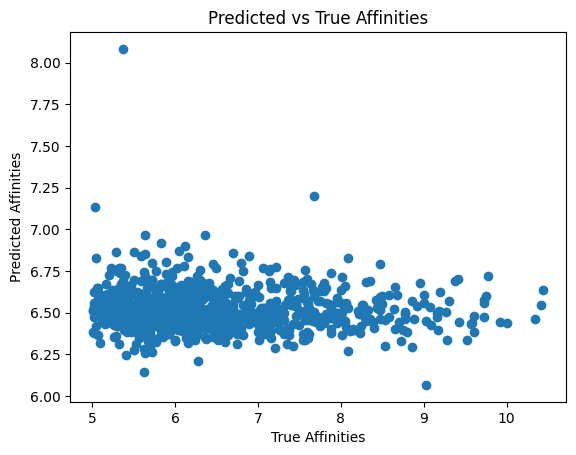

In [26]:
import matplotlib.pyplot as plt

plt.scatter(test_labels, predicted_affinities)
plt.xlabel('True Affinities')
plt.ylabel('Predicted Affinities')
plt.title('Predicted vs True Affinities')
plt.show()

In [28]:
for actual, predicted in zip(test_labels, predicted_affinities):
    print(f"Actual pKd: {actual}")
    print(f"Predicted pKd: {predicted[0]}")
    print(f" ")

# Calculate and print overall metrics
mse = mean_squared_error(test_labels, predicted_affinities)
mae = mean_absolute_error(test_labels, predicted_affinities)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Actual pKd: 5.244125144
Predicted pKd: 6.60217809677124
 
Actual pKd: 6.920818754
Predicted pKd: 6.504882335662842
 
Actual pKd: 5.886056648
Predicted pKd: 6.494709491729736
 
Actual pKd: 7.431798276
Predicted pKd: 6.57120943069458
 
Actual pKd: 5.744727495
Predicted pKd: 6.59631872177124
 
Actual pKd: 6.086186148
Predicted pKd: 6.392919063568115
 
Actual pKd: 8.0
Predicted pKd: 6.636415958404541
 
Actual pKd: 6.744727495
Predicted pKd: 6.372015476226807
 
Actual pKd: 7.124938737
Predicted pKd: 6.39700984954834
 
Actual pKd: 7.15490196
Predicted pKd: 6.347884178161621
 
Actual pKd: 5.15490196
Predicted pKd: 6.46768856048584
 
Actual pKd: 7.236572006
Predicted pKd: 6.438660144805908
 
Actual pKd: 6.958607315
Predicted pKd: 6.478973388671875
 
Actual pKd: 5.698970004
Predicted pKd: 6.470566749572754
 
Actual pKd: 5.468521083
Predicted pKd: 6.664760112762451
 
Actual pKd: 7.13667714
Predicted pKd: 6.42315673828125
 
Actual pKd: 8.055517328
Predicted pKd: 6.560263156890869
 
Actual pKd: 7.